In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('bigdatamart_train.csv')
test=pd.read_csv('bigdatamart_test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
train['Source']='train'
test['Source']='test'
df=pd.concat([train,test],ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
print(train.shape, test.shape, df.shape) 

(8523, 13) (5681, 12) (14204, 13)


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
df['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat',inplace=True)

In [12]:
df['Item_Fat_Content'].replace(['reg'],'Regular',inplace=True)

In [13]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
df[pd.isnull(df).any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [15]:
#columns = [x for x in df.dtypes.index if data.dtypes[x]=='object']
#print(columns)

In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [18]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [21]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [22]:
df.Item_Identifier.value_counts()

FDT12    10
FDC60    10
FDM60    10
NCC18    10
FDW24    10
         ..
FDM50     7
FDR51     7
FDL50     7
FDX49     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [24]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [26]:
#df['Outlet_Size'] = df['Outlet_Type'].apply(lambda x: 'Medium' if x == 'Supermarket Type2'or'Supermarket Type3'  else 'Small')
df.loc[(df['Outlet_Type'] == 'Supermarket Type1') | (df['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'  

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [28]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Small,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,train


In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train


In [30]:
df['Esatblished Year']=2013-df['Outlet_Establishment_Year']

In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Esatblished Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,16
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,4
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test,11
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test,6


In [32]:
df.rename(columns = {'Esatblished Year':'Total Years'}, inplace = True) 

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Total Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train,26


In [34]:
df['Item Type']=df['Item_Identifier'].apply(lambda x:x[0:2])
print(df['Item Type'])

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item Type, Length: 14204, dtype: object


In [35]:
df['Item Type']=df['Item Type'].map({
    'FD':'Food',
    'DR':'Drinks',
    'NC':'Non-consumable'
})

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Total Years,Item Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train,14,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train,26,Non-consumable


In [37]:
df.loc[df['Item Type']=="Non-consumable",'Item_Fat_Content'] = "Non Consumable "

In [38]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source', 'Total Years',
       'Item Type'],
      dtype='object')

In [39]:
df['Item_Fat_Content'].value_counts()

Low Fat            6499
Regular            5019
Non Consumable     2686
Name: Item_Fat_Content, dtype: int64

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Total Years,Item Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train,14,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food
4,NCD19,8.93,Non Consumable,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train,26,Non-consumable


In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
Total Years                     0
Item Type                       0
dtype: int64

In [42]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Total Years
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,15.169319
std,4.234226,0.051459,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400,9.000000
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000,14.000000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [43]:
visibility_mean=df.Item_Visibility.mean()

In [44]:
visibility_mean

0.06595278007399345

In [45]:
df['Item_Visibility'].replace([0],visibility_mean,inplace=True)

In [46]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Total Years
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.070034,141.004977,1997.830681,2181.288914,15.169319
std,4.234226,0.048602,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,9.300000,0.033143,94.012000,1987.000000,834.247400,9.000000
50%,12.792854,0.062347,142.247000,1999.000000,1794.331000,14.000000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Total Years,Item Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,train,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,train,14,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food
4,NCD19,8.93,Non Consumable,0.065953,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,train,26,Non-consumable


In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col_data = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item Type','Outlet_Type','Item_Type','Outlet_Identifier','Item_Identifier']
for i in col_data:
    df[i] = encoder.fit_transform(df[i])


In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Total Years,Item Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train,14,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,0,2,2,443.4228,train,4,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train,14,1
3,1121,19.20,2,0.065953,6,182.0950,0,1998,1,2,0,732.3800,train,15,1
4,1297,8.93,1,0.065953,9,53.8614,1,1987,1,2,1,994.7052,train,26,2


In [50]:
#df.drop(['Item_Identifier'],axis=1,inplace=True)

In [51]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Total Years,Item Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train,14,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,0,2,2,443.4228,train,4,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train,14,1
3,1121,19.20,2,0.065953,6,182.0950,0,1998,1,2,0,732.3800,train,15,1
4,1297,8.93,1,0.065953,9,53.8614,1,1987,1,2,1,994.7052,train,26,2


In [52]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
df = df[['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Source', 'Total Years',
       'Item Type', 'Item_Outlet_Sales']]

In [53]:
train=df.loc[df['Source']=="train"]
test=df.loc[df['Source']=="test"]

In [54]:
test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
train.drop(['Source'],axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Source', 'Total Years',
       'Item Type', 'Item_Outlet_Sales'],
      dtype='object')

In [56]:
train.to_csv("Bigdata_train_final.csv",index=False)
test.to_csv("Bigdata_test_final.csv",index=False)

In [57]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Total Years,Item Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,14,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,0,2,2,4,0,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,14,1,2097.2700
3,1121,19.20,2,0.065953,6,182.0950,0,1,2,0,15,1,732.3800
4,1297,8.93,1,0.065953,9,53.8614,1,1,2,1,26,2,994.7052


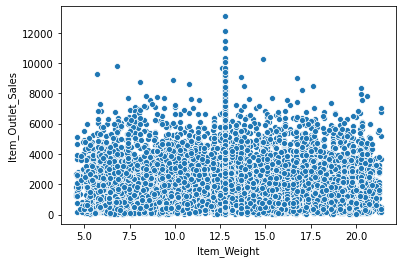

In [58]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)

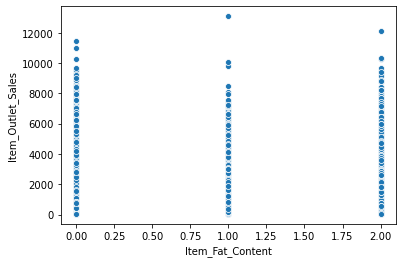

In [59]:
sns.scatterplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

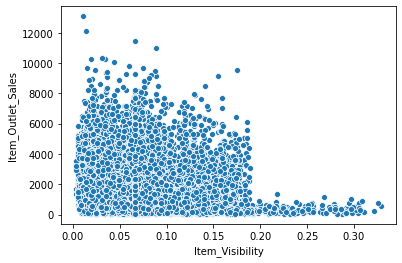

In [60]:

sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)

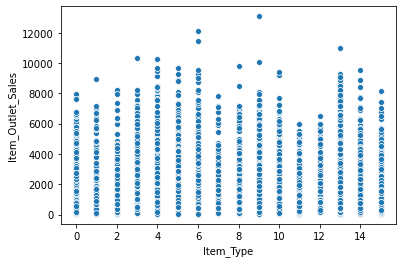

In [61]:
sns.scatterplot(x='Item_Type',y='Item_Outlet_Sales',data=train)

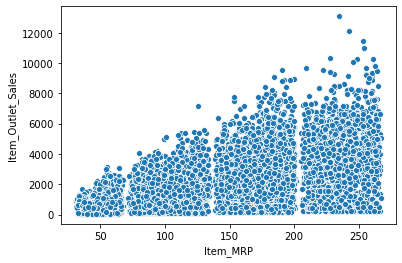

In [62]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

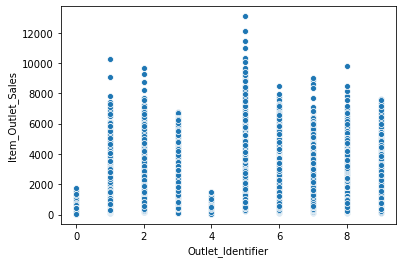

In [63]:
sns.scatterplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

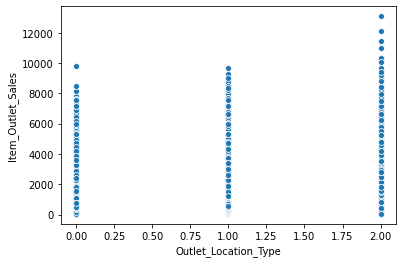

In [64]:
sns.scatterplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)

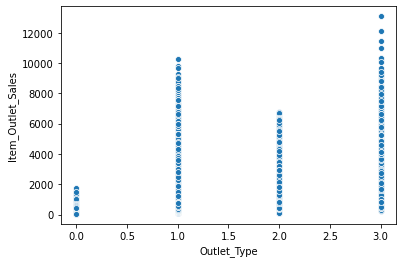

In [65]:
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

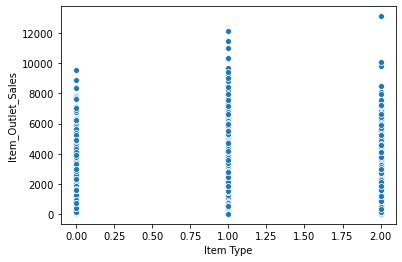

In [66]:
sns.scatterplot(x='Item Type',y='Item_Outlet_Sales',data=train)

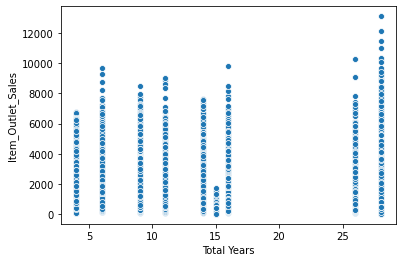

In [67]:
sns.scatterplot(x='Total Years',y='Item_Outlet_Sales',data=train)

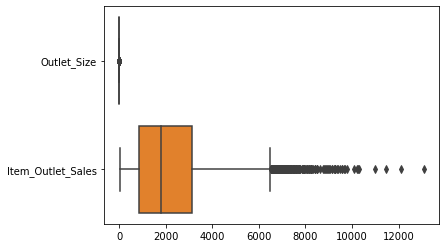

In [68]:
sns.boxplot(data=train[['Outlet_Size','Item_Outlet_Sales']],orient='h')

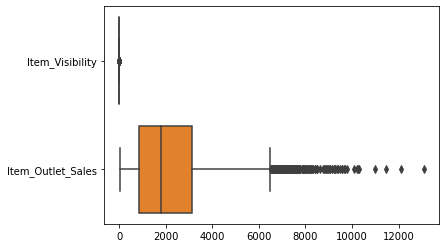

In [69]:
sns.boxplot(data=train[['Item_Visibility','Item_Outlet_Sales']],orient='h')

In [70]:
cor=train.corr()

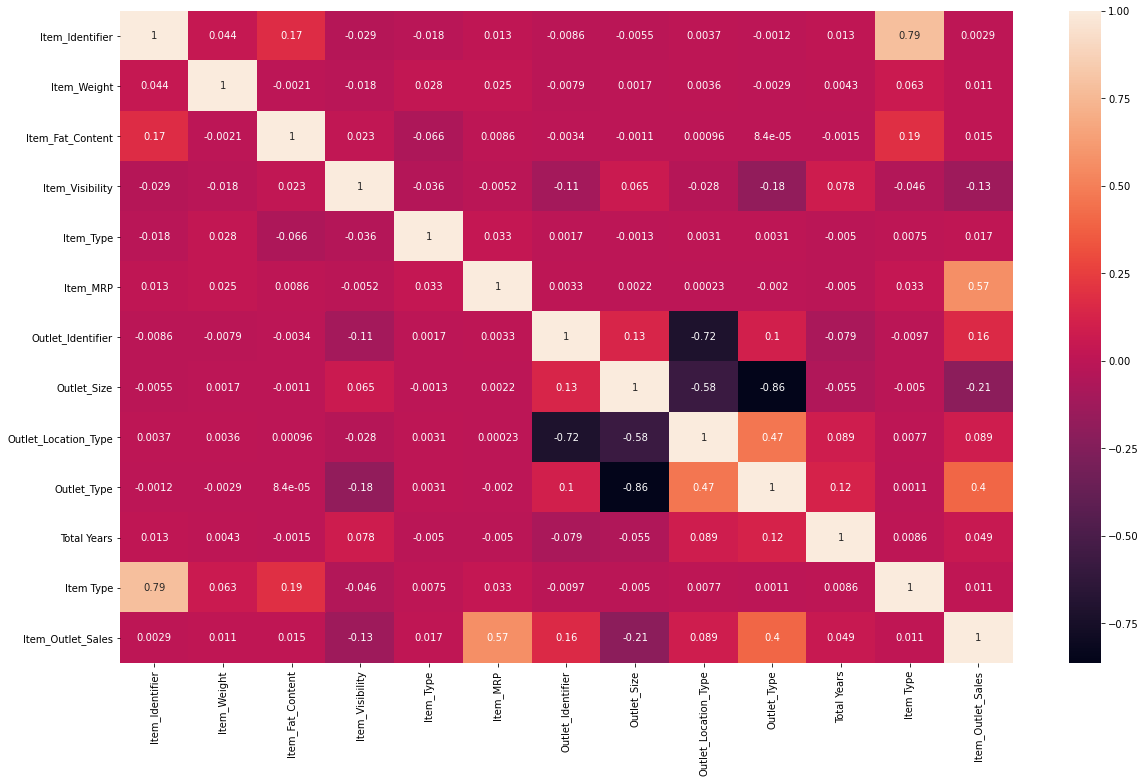

In [71]:
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True)
plt.show()

In [72]:
train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Total Years,Item Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.846524,0.892995,0.070202,7.226681,140.992782,4.722281,0.781415,1.112871,1.201220,15.168133,1.093864,2181.288914
std,449.222377,4.226194,0.895005,0.048742,4.209990,62.275067,2.837201,0.413311,0.812757,0.796459,8.371760,0.522090,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.033085,4.000000,93.826500,2.000000,1.000000,0.000000,1.000000,9.000000,1.000000,834.247400
50%,783.000000,12.792854,1.000000,0.062517,6.000000,143.012800,5.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,1.000000,2.000000,1.000000,26.000000,1.000000,3101.296400
max,1558.000000,21.350000,2.000000,0.328391,15.000000,266.888400,9.000000,1.000000,2.000000,3.000000,28.000000,2.000000,13086.964800


In [73]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train))
threshold=3
new_df=train[(z<3).all(axis=1)]

In [74]:
new_df.shape

(8334, 13)

In [75]:
train.shape

(8523, 13)

In [76]:
new_df.skew()

Item_Identifier        -0.007589
Item_Weight             0.096752
Item_Fat_Content        0.210399
Item_Visibility         0.865059
Item_Type               0.098136
Item_MRP                0.138877
Outlet_Identifier      -0.065455
Outlet_Size            -1.378059
Outlet_Location_Type   -0.202747
Outlet_Type             0.957677
Total Years             0.423858
Item Type               0.111713
Item_Outlet_Sales       0.877845
dtype: float64

In [77]:
X=new_df.drop(['Item_Outlet_Sales'],axis=1)
Y=new_df.Item_Outlet_Sales

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(X)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f"best accuracy : {accu*100} found on the random state {best_rstate}")

best accuracy : 58.880054053781905 found on the random state 378


In [80]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=378)

In [81]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy is {r2score*100},cross_val_score={cvscore*100} & differrence is {(r2score*100)-(cvscore*100)}")

Accuracy is 58.880054053781905,cross_val_score=54.1015643289931 & differrence is 4.778489724788805


In [82]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy is {r2score*100},cross_val_score={cvscore*100} & differrence is {(r2score*100)-(cvscore*100)}")

Accuracy is 57.42623958700075,cross_val_score=52.432809564545394 & differrence is 4.993430022455357


In [83]:
from sklearn.ensemble import AdaBoostRegressor
AB=AdaBoostRegressor()
AB.fit(x_train,y_train)
y_pred=AB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy is {r2score*100},cross_val_score={cvscore*100} & differrence is {(r2score*100)-(cvscore*100)}")

Accuracy is 56.6429984459048,cross_val_score=53.75410335934515 & differrence is 2.88889508655965


In [84]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy is {r2score*100},cross_val_score={cvscore*100} & differrence is {(r2score*100)-(cvscore*100)}")

Accuracy is 58.80045573490327,cross_val_score=54.13236404000059 & differrence is 4.668091694902678


In [96]:
parameters={"max_iter":[500,700,900,1100,1200,1300,1400,1500],
           "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
           "penalty":["elasticnet","11","12"]}
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }
parameters_2= {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
param_grid_SGD = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

In [100]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(x_train, y_train)

In [102]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   53.1s finished


Best Score:  0.5410156828535886
Best Params:  {'alpha': 0.1}


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

GCV=GridSearchCV(RandomForestRegressor(),para_grids,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_Pred=GCV.best_estimator_.predict(x_test)
print("final accuracy : ",r2_score(y_test,GCV_Pred)*100)

final accuracy :  58.936467540267714


Random Forest Regressor is the best method.